In [27]:
#Importando nossas bibliotesas:
from minisom import MiniSom
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar, plot

In [23]:
#Definindo Data Set e variáveis:
base = pd.read_csv('credit_data.csv')
base = base.dropna()
base.loc[base.age < 0, 'age'] = 40.92 #Definindo todas as idades negativas no Data Set como 40.92, pois essa é a média das idades.

In [24]:
X = base.iloc[:, 0:4].values
y = base.iloc[:, 4].values

In [25]:
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)

In [26]:
som = MiniSom(x = 15, y = 15, input_len = 4, random_seed = 0)
som.random_weights_init(X) #Inicialização dos pesos
som.train_random(data = X, num_iteration = 100) #Modelo de treinamento, interação equivale ao número de repetições.

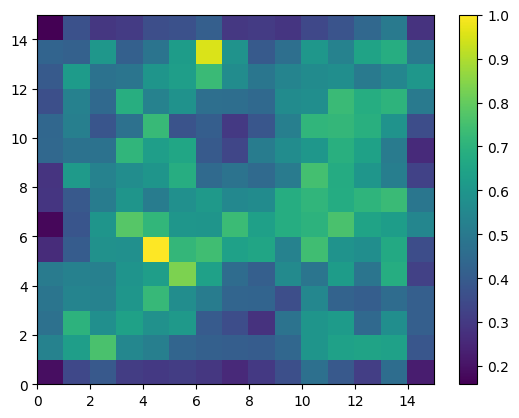

In [29]:
pcolor(som.distance_map().T)
colorbar()

In [30]:
markers = ['o', 's']
colors = ['r', 'g']

In [52]:
for i, x in enumerate(X):
    print(i)
    print(x)
    #w = som.winner(x)
    #plot(w[0] + 1 , w[1] + 1 , markers[y[i]],
         #markerfacecolor = 'None', markersize = 12,
         #markeredgecolor = colors[y[i]], markeredgewidth = 1)
    
#Nosso for vai percorrer registro a registro na nossa base de dados, ele irá pegar qual é o neurônio vencedor de cada um desses registros e ele vai plotar no nosso gráfico (Se algum dos nossos neurônios vencedores escolher um neurônio amarelo ele é categorizado como um outlier)

#I é igual a I

#O circulo representa os clientes que possuiram o crédito aprovado, verdes são o contrário.

0
[0.         0.9231759  0.89209175 0.58883739]
1
[5.00250125e-04 2.88121646e-01 6.54707879e-01 4.76826954e-01]
2
[0.0010005  0.74633429 0.9811888  0.58262011]
3
[0.00150075 0.45407166 0.60319752 0.44332796]
4
[0.002001   0.93911717 0.0115241  0.63704537]
5
[0.00250125 0.09782828 0.85843491 0.00102588]
6
[0.0030015  0.56853121 0.19064875 0.41564403]
7
[0.00350175 0.0897468  0.323246   0.21574254]
8
[0.004002   0.41296337 0.81542749 0.3454094 ]
9
[0.00450225 0.10126575 0.47305737 0.10228014]
10
[0.0050025  0.88267047 0.16604857 0.31600105]
11
[0.00550275 0.78874378 0.92377791 0.6722184 ]
12
[0.006003   0.8210259  0.18075933 0.42804408]
13
[0.00650325 0.1451247  0.94783979 0.34569726]
14
[0.0070035  0.86127332 0.46053848 0.13432878]
15
[0.00750375 0.60997414 0.49796387 0.28884883]
16
[0.008004   0.47086038 0.46866141 0.28581621]
17
[0.00850425 0.46744951 0.93197499 0.23802671]
18
[0.0090045  0.01056148 0.95031808 0.22928729]
19
[0.00950475 0.77774986 0.17468417 0.36064338]
20
[0.010005  